<a href="https://colab.research.google.com/github/syakinaaull/06-Kmeans/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
from google.colab import files
uploaded = files.upload()  # Upload file: Mall_Customers.csv

df = pd.read_csv("Mall_Customers.csv")

Saving Mall_Customers.csv to Mall_Customers.csv


In [11]:
from tabulate import tabulate
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))


+---+------------+--------+-----+--------------------+------------------------+----------------------+---------------------+
|   | CustomerID | Genre  | Age | Annual Income (k$) | Spending Score (1-100) |         PC1          |         PC2         |
+---+------------+--------+-----+--------------------+------------------------+----------------------+---------------------+
| 0 |     1      |  Male  | 19  |         15         |           39           | -0.6157200190433788  | -1.763480878465656  |
| 1 |     2      |  Male  | 21  |         15         |           81           |  -1.665792713434654  | -1.8207469510592613 |
| 2 |     3      | Female | 20  |         16         |           6            | 0.33786190851575626  | -1.6747989372314536 |
| 3 |     4      | Female | 23  |         16         |           77           | -1.4565732549230124  | -1.7724299195461668 |
| 4 |     5      | Female | 31  |         17         |           40           | -0.03846520777955387 | -1.6627401215058228 |


In [14]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


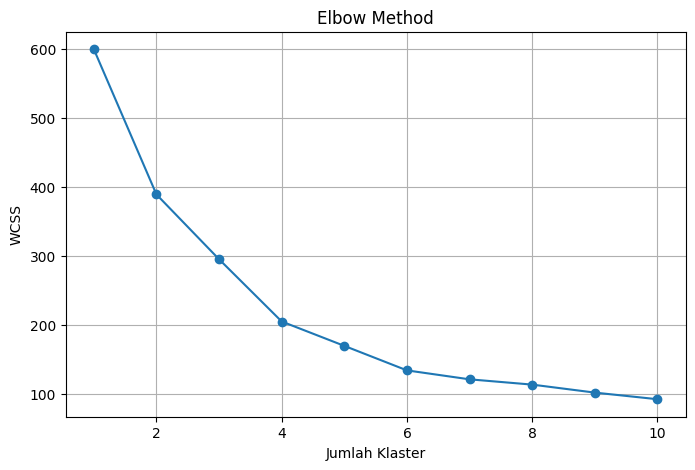

In [13]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Klaster")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()



In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

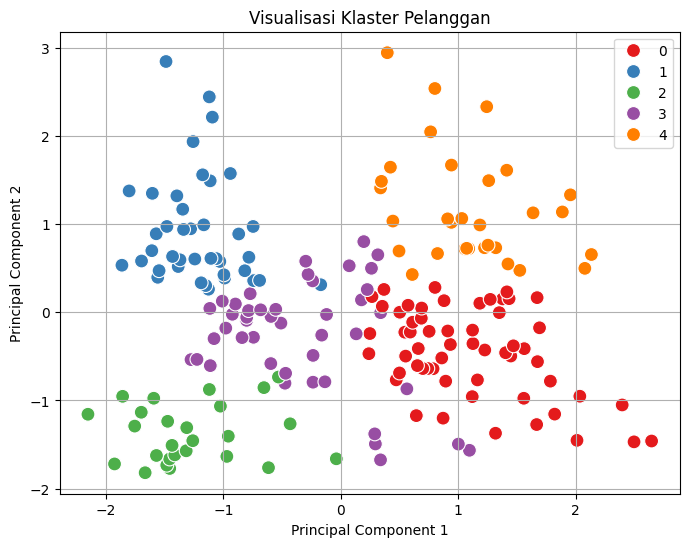

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# Tambahkan kolom 'Cluster' hasil clustering, misalnya dari KMeans
df['Cluster'] = kmeans.labels_  # <-- ini penting!

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='Set1', s=100)
plt.title('Visualisasi Klaster Pelanggan')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
for i in range(5):
    print(f"\n📊 Statistik Ringkasan Klaster {i}:")
    cluster_data = df[df['Cluster'] == i][['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    print(tabulate(cluster_data.describe(), headers='keys', tablefmt='fancy_grid'))



📊 Statistik Ringkasan Klaster 0:
╒═══════╤══════════╤══════════════════════╤══════════════════════════╕
│       │      Age │   Annual Income (k$) │   Spending Score (1-100) │
╞═══════╪══════════╪══════════════════════╪══════════════════════════╡
│ count │ 58       │              58      │                  58      │
├───────┼──────────┼──────────────────────┼──────────────────────────┤
│ mean  │ 55.2759  │              47.6207 │                  41.7069 │
├───────┼──────────┼──────────────────────┼──────────────────────────┤
│ std   │  8.57126 │              13.4136 │                  15.6978 │
├───────┼──────────┼──────────────────────┼──────────────────────────┤
│ min   │ 40       │              19      │                   3      │
├───────┼──────────┼──────────────────────┼──────────────────────────┤
│ 25%   │ 49       │              39.25   │                  37.25   │
├───────┼──────────┼──────────────────────┼──────────────────────────┤
│ 50%   │ 53       │              48.5    │